In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/gdrive/My Drive/DS_contest/trainSet.csv')
data

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
0,354,134,3323,3298,15384,10746,0.583087,0.520701,0.202393,2015/05/21,2015/05/01,2021/07/31,Oil: CWS-DynaGel,1197.61,66.53,3214.70,178.59,18,1249.60,73.50,1148.37,3248.30,2.57,0.96,Ceramic/Sand,FTecISP,30/50,35.48,638.70,638.70,558.91,99580.58333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,372,142,3073,3054,20167,10440,1.059932,0.402927,0.242269,2014/10/16,2014/10/01,2021/07/31,Water: SLB-WaterFrac (WF),4212.32,117.01,9727.20,270.20,36,2711.90,77.41,1604.27,11438.43,3.59,1.55,Ceramic/Sand,HydroProp,40/80,13.80,496.97,496.97,3715.35,82942.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,383,146,3318,3291,18832,10745,1.913723,0.351151,0.274381,2019/03/14,2019/03/01,2021/07/31,Slickwater,5131.40,95.03,52997.80,981.44,54,2275.37,42.88,914.98,52997.80,23.29,2.26,Sand,Sand,40/70,95.03,5131.40,0.00,5131.40,55833.66667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,395,148,3220,3188,20243,10884,0.185481,0.231014,0.305237,2019/03/19,2019/02/01,2021/07/31,Slickwater,3044.00,49.90,42791.76,701.50,61,2687.20,43.04,0.00,51059.60,15.92,1.13,Sand,White,40/70,49.90,3044.00,0.00,3044.00,95592.08333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,397,149,3220,3189,19085,10916,0.432910,0.214301,0.306795,2019/03/19,2019/02/01,2021/07/31,Slickwater,5374.00,99.52,50769.92,940.18,54,2351.45,42.70,0.00,53236.05,21.59,2.29,Sand,White,40/70,99.09,5351.00,0.00,5374.00,104730.33330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,708,286,3048,3027,19462,10351,0.061657,0.368939,0.543000,2017/09/19,2017/09/01,2021/07/31,Slickwater,6209.34,159.21,4493

In [ ]:
data_exam = pd.read_csv('/gdrive/My Drive/DS_contest/examSet.csv')

In [ ]:
data.columns

Index(['No', 'CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD',
       ...
       'HRS_MONTH_27', 'HRS_MONTH_28', 'HRS_MONTH_29', 'HRS_MONTH_30',
       'HRS_MONTH_31', 'HRS_MONTH_32', 'HRS_MONTH_33', 'HRS_MONTH_34',
       'HRS_MONTH_35', 'HRS_MONTH_36'],
      dtype='object', length=141)

In [ ]:
# df1.to_csv('/gdrive/My Drive/DS_contest/df1.csv')

In [ ]:
#length 232(i=0 to 231)의 data2 list 만들기 (각각의 원소는 series)
data2 = []
for i in range(48,280):
  data2.append(data.iloc[i])
data2[0]

No                               1
CPA Pretty Well ID               1
Reference (KB) Elev. (ft)     2908
Ground Elevation (ft)         2888
MD (All Wells) (ft)          20325
                             ...  
HRS_MONTH_32                   255
HRS_MONTH_33                   728
HRS_MONTH_34                   720
HRS_MONTH_35                   742
HRS_MONTH_36                   726
Name: 48, Length: 141, dtype: object

In [ ]:
#GAS_MONTH_1 ~ 36, Last 6 mo. Avg. GAS (Mcf), CND_MON_1 ~ 36, HRS_MONTH_1 ~ 36
#GAS , CND, HRS, time (1~36)]

#arb[i]는 series, data2[i], arbdf[i]는 데이터프레임
arb = []
arbdf = []
for i in range(232):
  arb.append(data2[i])
  data2[i] = data2[i].to_frame().transpose()
  arbdf.append(data2[i])
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726


In [ ]:
for i in range(232):
  for j in range(5):
    data2[i] = pd.concat([data2[i],arbdf[i]],axis=0,sort=False, join='outer')
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,...,CND_MONTH_33,CND_MONTH_34,CND_MONTH_35,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,5037,4230,4203,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732

In [ ]:
# 32~67 GAS, 68:Last 6 mo. Avg. GAS (Mcf), 105~140 HRS
for i in range(232):
  GAS_list = []
  HRS_list = []
  ID_index = []
  for j in range(6):
    GAS_list.append(arb[i][6*j+32]+arb[i][6*j+33]+arb[i][6*j+34]+arb[i][6*j+35]+arb[i][6*j+36]+arb[i][6*j+37])
    HRS_list.append(arb[i][6*j+105]+arb[i][6*j+106]+arb[i][6*j+107]+arb[i][6*j+108]+arb[i][6*j+109]+arb[i][6*j+110])
    ID_index.append(i)
  data2[i]['Y_t'] = GAS_list
  data2[i]['J_t'] = HRS_list
  data2[i]['ID index'] = ID_index
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),GAS_MONTH_1,GAS_MONTH_2,GAS_MONTH_3,GAS_MONTH_4,GAS_MONTH_5,GAS_MONTH_6,GAS_MONTH_7,GAS_MONTH_8,...,CND_MONTH_36,HRS_MONTH_1,HRS_MONTH_2,HRS_MONTH_3,HRS_MONTH_4,HRS_MONTH_5,HRS_MONTH_6,HRS_MONTH_7,HRS_MONTH_8,HRS_MONTH_9,HRS_MONTH_10,HRS_MONTH_11,HRS_MONTH_12,HRS_MONTH_13,HRS_MONTH_14,HRS_MONTH_15,HRS_MONTH_16,HRS_MONTH_17,HRS_MONTH_18,HRS_MONTH_19,HRS_MONTH_20,HRS_MONTH_21,HRS_MONTH_22,HRS_MONTH_23,HRS_MONTH_24,HRS_MONTH_25,HRS_MONTH_26,HRS_MONTH_27,HRS_MONTH_28,HRS_MONTH_29,HRS_MONTH_30,HRS_MONTH_31,HRS_MONTH_32,HRS_MONTH_33,HRS_MONTH_34,HRS_MONTH_35,HRS_MONTH_36,Y_t,J_t,ID index
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726,770490.0,4042.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726,487446.0,4146.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726,358656.0,4158.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726,297204.0,4406.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,255,728,720,742,726,253764.0,4081.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,129303,162132,126960,118344,123348,110403,97038,82473,...,3969,600,744,681,600,716,701,648,657,677,710,734,720,660,744,716,739,708,591,741,720,744,720,743,738,694,732,720,669,706,560,743,2

In [ ]:
for i in range(232):
  for j in range(36):
    data2[i] = data2[i].drop('GAS_MONTH_'+str(j+1),axis=1)
    data2[i] = data2[i].drop('CND_MONTH_'+str(j+1),axis=1)
    data2[i] = data2[i].drop('HRS_MONTH_'+str(j+1),axis=1)
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),Last 6 mo. Avg. GAS (Mcf),Y_t,J_t,ID index
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,770490.0,4042.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,487446.0,4146.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,358656.0,4158.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,297204.0,4406.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,253764.0,4081.0,0
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,243675.0,3914.0,0


In [ ]:
import datetime as dt

In [ ]:
for i in range(232):
  time_list = []
  # time_list의 첫항은 (Last month - on month)/6 + 1
  time_list.append((dt.datetime.strptime(arb[i]['Last Prod. YYYY/MM'],'%Y/%m/%d') - dt.datetime.strptime(arb[i]['On Prod YYYY/MM/DD'],'%Y/%m/%d') - dt.timedelta(days=1095)).days // 183 + 1)
  for j in range(5):
    time_list.append(time_list[j]+1)
  data2[i]['time'] = time_list
data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),Last 6 mo. Avg. GAS (Mcf),Y_t,J_t,ID index,time
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,770490.0,4042.0,0,1
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,487446.0,4146.0,0,2
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,358656.0,4158.0,0,3
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,297204.0,4406.0,0,4
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,253764.0,4081.0,0,5
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,243675.0,3914.0,0,6


In [ ]:
data2[9]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),Last 6 mo. Avg. GAS (Mcf),Y_t,J_t,ID index,time
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,1217430.0,2509.0,9,7
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,471306.0,4323.0,9,8
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,210996.0,3794.0,9,9
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,155466.0,2553.0,9,10
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,140451.0,1438.0,9,11
57,23,10,2957,2938,15328,10430,104.256,0.593248,0.093349,2015/07/28,2015/07/01,2021/07/31,Water: Sanjel-N2 FOAMjel,2657.5,126.55,3144.95,149.76,21,1436.3,69.9,462,3143.86,2.19,1.85,Ceramic/Sand,HydroProp,40/80,30.04,630.8,630.8,2026.7,91517.7,18253,109518.0,1677.0,9,12


In [ ]:
#for i in range(232):
 # data2[i] = data2[i].drop('On Prod YYYY/MM/DD',axis=1)
  #data2[i] = data2[i].drop('First Prod YYYY/MM',axis=1)
  #data2[i] = data2[i].drop('Last Prod. YYYY/MM',axis=1)
#data2[0]

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),Last 6 mo. Avg. GAS (Mcf),Y_t,J_t,time
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,770490.0,4042.0,1
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,487446.0,4146.0,2
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,358656.0,4158.0,3
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,297204.0,4406.0,4
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,253764.0,4081.0,5
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,243675.0,3914.0,6


In [ ]:
#df2는 2번생산정만 포함, 각 생산정마다 6row 가짐.
df2 = data2[0]
for i in range(231):
  df2 = pd.concat([df2,data2[i+1]],axis=0,sort=False, join='outer')
df2

,No,CPA Pretty Well ID,Reference (KB) Elev. (ft),Ground Elevation (ft),MD (All Wells) (ft),TVD (ft),Bot-Hole direction (N/S)/(E/W),Bot-Hole Easting (NAD83),Bot-Hole Northing (NAD83),On Prod YYYY/MM/DD,First Prod YYYY/MM,Last Prod. YYYY/MM,Stimulation Fluid,Total Proppant Placed (tonne),Avg Proppant Placed per Stage (tonne),Total Fluid Pumped (m3),Avg Fluid Pumped per Stage (m3),Stages Actual,Completed Length (m),Avg Frac Spacing (m),Load Fluid Rec (m3),Load Fluid (m3),Avg Fluid Pumped / Meter (m3),Avg Proppant Placed / Meter (tonne),Proppant Composition,Proppant Name 1,Proppant Size 1,Avg Proppant 1 Placed (tonne),Total Proppant 1 Placed (tonne),Total Ceramic Proppant Placed (tonne),Total Sand Proppant Placed (tonne),First 6 mo. Avg. GAS (Mcf),Last 6 mo. Avg. GAS (Mcf),Y_t,J_t,ID index,time
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,770490.0,4042.0,0,1
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,487446.0,4146.0,0,2
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,358656.0,4158.0,0,3
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,297204.0,4406.0,0,4
48,1,1,2908,2888,20325,10015,0.834538,0.82466,0.00607458,2018/02/04,2018/02/01,2021/07/31,Slickwater,5821.72,145.54,40553.7,1013.84,40,2947.7,75.56,2295.07,41017.9,13.76,1.98,Sand,Sand,40/70,145.54,5821.72,0,5821.72,99180.3,40612.5,253764.0,4081.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,2015/04/13,2015/04/01,2021/07/31,Water,4479.2,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.6,3.51,1.54,Sand,Sand,40/70,159.97,4479.2,0,4479.2,36691.3,17640.5,329958.0,2001.0,231,8
279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,2015/04/13,2015/04/01,2021/07/31,Water,4479.2,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.6,3.51,1.54,Sand,Sand,40/70,159.97,4479.2,0,4479.2,36691.3,17640.5,282465.0,4231.0,231,9
279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,2015/04/13,2015/04/01,2021/07/31,Water,4479.2,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.6,3.51,1.54,Sand,Sand,40/70,159.97,4479.2,0,4479.2,36691.3,17640.5,192624.0,4085.0,231,10
279,722,290,3083,3061,20364,10130,0.963504,0.408422,0.544864,2015/04/13,2015/04/01,2021/07/31,Water,4479.2,159.97,10172.1,363.29,28,2900.87,106.05,1172.15,10161.6,3.51,1.54,Sand,Sand,40/70,159.97,4479.2,0,4479.2,36691.3,17640.5,167433.0,4089.0,231,11


In [ ]:
df2.columns

Index(['No', 'CPA Pretty Well ID', 'Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)', 'TVD (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)', 'On Prod YYYY/MM/DD', 'First Prod YYYY/MM',
       'Last Prod. YYYY/MM', 'Stimulation Fluid',
       'Total Proppant Placed (tonne)',
       'Avg Proppant Placed per Stage (tonne)', 'Total Fluid Pumped (m3)',
       'Avg Fluid Pumped per Stage (m3)', 'Stages Actual',
       'Completed Length (m)', 'Avg Frac Spacing (m)', 'Load Fluid Rec (m3)',
       'Load Fluid (m3)', 'Avg Fluid Pumped / Meter (m3)',
       'Avg Proppant Placed / Meter (tonne)', 'Proppant Composition',
       'Proppant Name 1', 'Proppant Size 1', 'Avg Proppant 1 Placed (tonne)',
       'Total Proppant 1 Placed (tonne)',
       'Total Ceramic Proppant Placed (tonne)',
       'Total Sand Proppant Placed (tonne)', 'First 6 mo. Avg. GAS (Mcf)',
       'Last 6 mo. Avg. GAS (Mcf)', 'Y_t', 'J_

In [ ]:
df2.rename(columns={'First 6 mo. Avg. GAS (Mcf)':'Y_first6'},inplace=True)
df2.rename(columns={'Last 6 mo. Avg. GAS (Mcf)':'Y_last6'},inplace=True)
df2 = df2.drop(['Reference (KB) Elev. (ft)',
       'Ground Elevation (ft)', 'MD (All Wells) (ft)',
       'Bot-Hole direction (N/S)/(E/W)', 'Bot-Hole Easting (NAD83)',
       'Bot-Hole Northing (NAD83)',
       'Avg Proppant Placed per Stage (tonne)', 'Total Fluid Pumped (m3)',
       'Avg Fluid Pumped per Stage (m3)', 'Stages Actual',
       'Completed Length (m)', 'Avg Frac Spacing (m)', 'Load Fluid Rec (m3)',
       'Load Fluid (m3)', 'Avg Fluid Pumped / Meter (m3)',
       'Avg Proppant Placed / Meter (tonne)', 'Proppant Composition',
       'Proppant Size 1', 'Avg Proppant 1 Placed (tonne)',
       'Total Proppant 1 Placed (tonne)',
       'Total Ceramic Proppant Placed (tonne)', 'On Prod YYYY/MM/DD', 
       'First Prod YYYY/MM','Last Prod. YYYY/MM'],axis=1)
df2.head(5)

,No,CPA Pretty Well ID,TVD (ft),Stimulation Fluid,Total Proppant Placed (tonne),Proppant Name 1,Total Sand Proppant Placed (tonne),Y_first6,Y_last6,Y_t,J_t,ID index,time
48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.3,40612.5,770490.0,4042.0,0,1
48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.3,40612.5,487446.0,4146.0,0,2
48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.3,40612.5,358656.0,4158.0,0,3
48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.3,40612.5,297204.0,4406.0,0,4
48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.3,40612.5,253764.0,4081.0,0,5


In [ ]:
df2.to_csv('/gdrive/My Drive/DS_contest/datasix.csv')

In [ ]:
df2 = pd.read_csv('/gdrive/My Drive/DS_contest/datasix.csv')

X_t 처리

In [ ]:
df2['J_t'] += 1

In [ ]:
df2['X_t'] = df2['Y_t']/df2['J_t']
df2.head(5)

,Unnamed: 0,No,CPA Pretty Well ID,TVD (ft),Stimulation Fluid,Total Proppant Placed (tonne),Proppant Name 1,Total Sand Proppant Placed (tonne),Y_first6,Y_last6,Y_t,J_t,ID index,time,X_t,normal
0,48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.33333,40612.5,770490.0,4044.0,0,1,190.526706,1
1,48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.33333,40612.5,487446.0,4148.0,0,2,117.513500,1
2,48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.33333,40612.5,358656.0,4160.0,0,3,86.215385,1
3,48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.33333,40612.5,297204.0,4408.0,0,4,67.423775,1
4,48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.33333,40612.5,253764.0,4083.0,0,5,62.151359,1


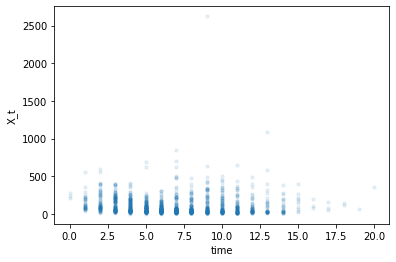

In [ ]:
df2.plot.scatter(x='time', y='X_t',s=10,alpha=0.1)

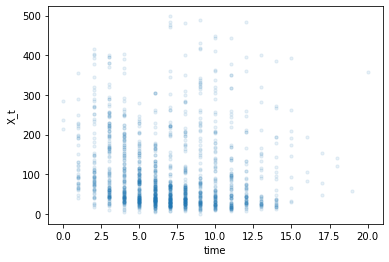

In [ ]:
df2[df2['X_t']<500].plot.scatter(x='time', y='X_t',s=10,alpha=0.1)

X_t가 100 이하인 비율(%): 66.0919540229885
X_t가 100 초과 200 이하인 비율(%): 17.887931034482758
X_t가 200 초과 300 이하인 비율(%): 9.770114942528735
X_t가 300 초과 400 이하인 비율(%): 3.807471264367816
X_t가 400 초과 500 이하인 비율(%): 1.4367816091954022
X_t가 500 초과인 비율(%): 1.0057471264367817


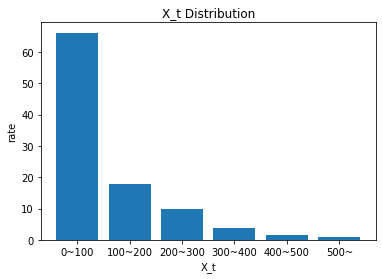

In [ ]:
print('X_t가 100 이하인 비율(%):',(df2[df2['X_t']<=100].size) / (df2.size) * 100)
print('X_t가 100 초과 200 이하인 비율(%):',(df2[(df2['X_t']>100) & (df2['X_t']<=200)].size) / (df2.size) * 100)
print('X_t가 200 초과 300 이하인 비율(%):',(df2[(df2['X_t']>200) & (df2['X_t']<=300)].size) / (df2.size) * 100)
print('X_t가 300 초과 400 이하인 비율(%):',(df2[(df2['X_t']>300) & (df2['X_t']<=400)].size) / (df2.size) * 100)
print('X_t가 400 초과 500 이하인 비율(%):',(df2[(df2['X_t']>400) & (df2['X_t']<=500)].size) / (df2.size) * 100)
print('X_t가 500 초과인 비율(%):',(df2[df2['X_t']>500].size) / (df2.size) * 100)

x = np.arange(6)
distri = ['0~100','100~200','200~300','300~400','400~500','500~']
value = [(df2[df2['X_t']<=100].size) / (df2.size) * 100, (df2[(df2['X_t']>100) & (df2['X_t']<=200)].size) / (df2.size) * 100, \
         (df2[(df2['X_t']>200) & (df2['X_t']<=300)].size) / (df2.size) * 100, (df2[(df2['X_t']>300) & (df2['X_t']<=400)].size) / (df2.size) * 100, \
         (df2[(df2['X_t']>400) & (df2['X_t']<=500)].size) / (df2.size) * 100, (df2[df2['X_t']>500].size) / (df2.size) * 100]
plt.bar(x, value)
plt.xticks(x, distri)
plt.xlabel('X_t')
plt.ylabel('rate')
plt.title('X_t Distribution')
plt.savefig('/gdrive/My Drive/DS_contest/Figures/X_t_six_Distribution.png')
plt.show()

X_t가 400이하(98%의 데이터)인 것을 normal로 잡자

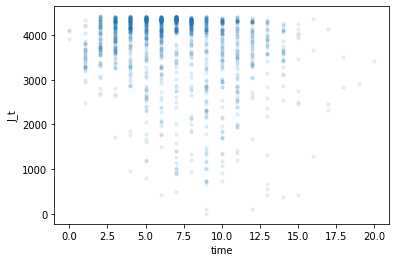

In [ ]:
df2.plot.scatter(x='time', y='J_t',s=10,alpha=0.1)

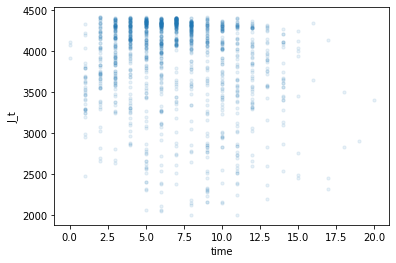

In [ ]:
df2[df2['J_t']>2000].plot.scatter(x='time', y='J_t',s=10,alpha=0.1)

J_t가 500시간 이하인 비율(%): 0.5747126436781609
J_t가 500시간 초과 1000시간 이하인 비율(%): 1.0057471264367817
J_t가 1000시간 초과 1500시간 이하인 비율(%): 2.0114942528735633
J_t가 1500시간 초과 2000시간 이하인 비율(%): 1.8678160919540232
J_t가 2000시간 초과 2500시간 이하인 비율(%): 2.8017241379310347
J_t가 2500시간 초과 3000시간 이하인 비율(%): 5.747126436781609
J_t가 3000시간 초과 3500시간 이하인 비율(%): 9.339080459770114
J_t가 3500시간 초과 4000시간 이하인 비율(%): 19.10919540229885
J_t가 4000시간 초과인 비율(%): 57.543103448275865


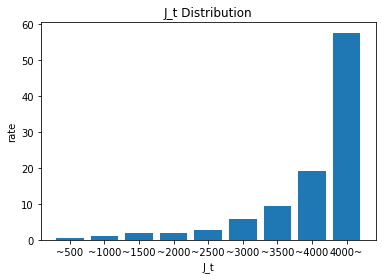

In [ ]:
print('J_t가 500시간 이하인 비율(%):',(df2[df2['J_t']<=500].size) / (df2.size) * 100)
print('J_t가 500시간 초과 1000시간 이하인 비율(%):',(df2[(df2['J_t']>500) & (df2['J_t']<=1000)].size) / (df2.size) * 100)
print('J_t가 1000시간 초과 1500시간 이하인 비율(%):',(df2[(df2['J_t']>1000) & (df2['J_t']<=1500)].size) / (df2.size) * 100)
print('J_t가 1500시간 초과 2000시간 이하인 비율(%):',(df2[(df2['J_t']>1500) & (df2['J_t']<=2000)].size) / (df2.size) * 100)
print('J_t가 2000시간 초과 2500시간 이하인 비율(%):',(df2[(df2['J_t']>2000) & (df2['J_t']<=2500)].size) / (df2.size) * 100)
print('J_t가 2500시간 초과 3000시간 이하인 비율(%):',(df2[(df2['J_t']>2500) & (df2['J_t']<=3000)].size) / (df2.size) * 100)
print('J_t가 3000시간 초과 3500시간 이하인 비율(%):',(df2[(df2['J_t']>3000) & (df2['J_t']<=3500)].size) / (df2.size) * 100)
print('J_t가 3500시간 초과 4000시간 이하인 비율(%):',(df2[(df2['J_t']>3500) & (df2['J_t']<=4000)].size) / (df2.size) * 100)
print('J_t가 4000시간 초과인 비율(%):',(df2[df2['J_t']>4000].size) / (df2.size) * 100)

x = np.arange(9)
distri = ['~500','~1000','~1500','~2000','~2500','~3000','~3500','~4000','4000~']
value = [(df2[df2['J_t']<=500].size) / (df2.size) * 100, (df2[(df2['J_t']>500) & (df2['J_t']<=1000)].size) / (df2.size) * 100, \
         (df2[(df2['J_t']>1000) & (df2['J_t']<=1500)].size) / (df2.size) * 100, (df2[(df2['J_t']>1500) & (df2['J_t']<=2000)].size) / (df2.size) * 100, \
         (df2[(df2['J_t']>2000) & (df2['J_t']<=2500)].size) / (df2.size) * 100, (df2[(df2['J_t']>2500) & (df2['J_t']<=3000)].size) / (df2.size) * 100, \
         (df2[(df2['J_t']>3000) & (df2['J_t']<=3500)].size) / (df2.size) * 100, (df2[(df2['J_t']>3500) & (df2['J_t']<=4000)].size) / (df2.size) * 100, \
         (df2[df2['J_t']>4000].size) / (df2.size) * 100]
plt.bar(x, value)
plt.xticks(x, distri)
plt.xlabel('J_t')
plt.ylabel('rate')
plt.title('J_t Distribution')
plt.savefig('/gdrive/My Drive/DS_contest/Figures/J_t_six_Distribution.png')
plt.show()

J_t는 2000시간 초과를(약 95%의 데이터) normal이라 하자


In [ ]:
df2['normal'] = (df2['X_t']<=400) & (df2['J_t']>2000)
df2 = df2.astype({'normal':'int'})
df2.head(5)

,Unnamed: 0,No,CPA Pretty Well ID,TVD (ft),Stimulation Fluid,Total Proppant Placed (tonne),Proppant Name 1,Total Sand Proppant Placed (tonne),Y_first6,Y_last6,Y_t,J_t,ID index,time,X_t,normal
0,48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.33333,40612.5,770490.0,4044.0,0,1,190.526706,1
1,48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.33333,40612.5,487446.0,4148.0,0,2,117.513500,1
2,48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.33333,40612.5,358656.0,4160.0,0,3,86.215385,1
3,48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.33333,40612.5,297204.0,4408.0,0,4,67.423775,1
4,48,1,1,10015,Slickwater,5821.72,Sand,5821.72,99180.33333,40612.5,253764.0,4083.0,0,5,62.151359,1


In [ ]:
df2 = df2.drop(['Unnamed: 0', 'CPA Pretty Well ID', 'TVD (ft)','Stimulation Fluid','Total Proppant Placed (tonne)','Proppant Name 1','Total Sand Proppant Placed (tonne)'],axis=1)

KeyError: ignored

In [ ]:
#data_[i]는 index i 생산정의 데이터
#data_x[i]는 index i 생산정의 데이터 중 normal인 것
data_ = []
for i in range(232):
  data_.append(df2[df2['ID index']==i])

In [ ]:
data_x = []
for i in range(232):
  data_x.append(df2[(df2['ID index']==i) & (df2['X_t']<=400) & (df2['J_t']>2000)])

In [ ]:
plt.figure(figsize = (80,160))
for i in range(232):
  ax = plt.subplot(29,8,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['X_t'],'-')
  plt.ylim([0,400])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/X_t_six-time.png')
plt.show()

In [ ]:
plt.figure(figsize = (80,160))
for i in range(232):
  ax = plt.subplot(29,8,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['Y_t'],'-')
  plt.ylim([0,1500000])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Y_t_six-time.png')
plt.show()

In [ ]:
plt.figure(figsize = (80,160))
for i in range(232):
  ax = plt.subplot(29,8,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_x[i]['time'],data_x[i]['X_t'],'-')
  plt.ylim([0,400])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/X_t_six-time(normal).png')
plt.show()

In [ ]:
plt.figure(figsize = (80,160))
for i in range(232):
  ax = plt.subplot(29,8,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_x[i]['time'],data_x[i]['Y_t'],'-')
  plt.ylim([0,1500000])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Y_t_six-time(normal).png')
plt.show()

NameError: ignored

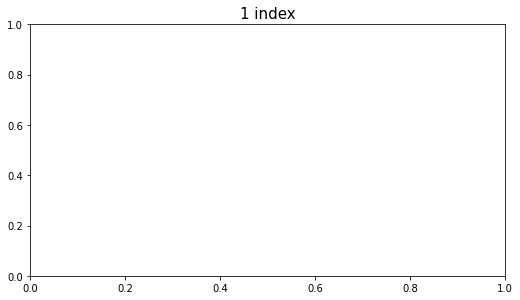

In [ ]:
plt.figure(figsize = (80,160))
for i in range(232):
  ax = plt.subplot(29,8,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_[i]['time'],data_[i]['J_t'],'-')
  plt.ylim([0,4500])

plt.tight_layout()
#plt.savefig('/gdrive/My Drive/DS_contest/Figures/J_t_six-time.png')
plt.show()

Log 그림

In [ ]:
df2 = pd.read_csv('/gdrive/My Drive/DS_contest/datathree_Interpolation_2.csv')

In [ ]:
df2 = df2.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [ ]:
df2['Log_X_t'] = np.log(df2['Interpolated X_t'])
df2.head(5)

,Unnamed: 0,Unnamed: 0.1,No,Y_t,J_t,ID index,time,X_t,normal,J_t_pred,Interpolated X_t,Log_X_t
0,0,0,1,418395.0,2026.0,0,2,206.512833,1,2084.3,206.512833,5.330363
1,1,1,1,352095.0,2018.0,0,3,174.477205,1,2084.3,174.477205,5.161794
2,2,2,1,260865.0,1983.0,0,4,131.550681,1,2084.3,131.550681,4.879392
3,3,3,1,226581.0,2165.0,0,5,104.656351,1,2084.3,104.656351,4.650682
4,4,4,1,187083.0,2121.0,0,6,88.205092,1,2084.3,88.205092,4.479665


In [ ]:
#data_[i]는 index i 생산정의 데이터
#data_x[i]는 index i 생산정의 데이터 중 normal인 것
data_ = []
for i in range(232):
  data_.append(df2[df2['ID index']==i])

In [ ]:
data_x = []
for i in range(232):
  data_x.append(df2[(df2['ID index']==i) & (df2['normal']==1)])

In [ ]:
plt.figure(figsize = (80,160))
for i in range(232):
  ax = plt.subplot(29,8,i+1)
  plt.title('%d index' %(i+1),fontsize=15)
  ax.plot(data_x[i]['time'],data_x[i]['Log_X_t'],'-')
  plt.ylim([0,7])

plt.tight_layout()
plt.savefig('/gdrive/My Drive/DS_contest/Figures/Log_X_t-time.png')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Log linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df2.columns

Index(['No', 'Y_t', 'J_t', 'ID index', 'time', 'X_t', 'normal', 'J_t_pred',
       'Interpolated X_t', 'Log_X_t'],
      dtype='object')

In [ ]:
df = df2.drop(['No', 'time', 'Y_t', 'J_t', 'ID index', 'X_t', 'normal', 'J_t_pred', 'Interpolated X_t'],axis=1)
df.head(5)

,Log_X_t
0,5.330363
1,5.161794
2,4.879392
3,4.650682
4,4.479665


In [ ]:
data2 = []
for i in range(232):
  data2.append(df.iloc[12*i:12*i+12])

In [ ]:
for i in range(232):
  data2[i] = data2[i].transpose()

In [ ]:
for i in range(232):
  data2[i].rename(columns = {12*i:'t1',12*i+1:'t2',12*i+2:'t3',12*i+3:'t4',12*i+4:'t5',12*i+5:'t6',12*i+6:'t7',12*i+7:'t8',12*i+8:'t9',12*i+9:'t10',12*i+10:'t11',12*i+11:'t12'},inplace=True)
data2[1]

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12
Log_X_t,5.642703,5.243031,4.969347,4.710193,4.531495,4.364868,4.241364,4.05044,3.888486,3.851343,4.077572,3.661802


In [ ]:
data2_df = data2[0]
for i in range(231):
  data2_df = pd.concat([data2_df,data2[i+1]],axis=0,sort=False, join='inner')
data2_df

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12
Log_X_t,5.330363,5.161794,4.879392,4.650682,4.479665,4.432549,4.273564,4.144129,4.090495,4.171196,4.364981,3.897297
Log_X_t,5.642703,5.243031,4.969347,4.710193,4.531495,4.364868,4.241364,4.050440,3.888486,3.851343,4.077572,3.661802
Log_X_t,5.786753,5.465353,4.663402,4.398794,4.078379,3.904132,3.861710,3.044078,3.402286,3.685489,3.774272,3.559928
Log_X_t,5.604538,4.940998,4.401512,4.252202,3.993071,4.179211,4.063686,3.542374,3.500599,3.668627,3.851983,3.473711
Log_X_t,5.796568,4.901615,4.887331,4.556563,4.032829,3.985807,4.303698,3.801740,3.582420,3.839058,3.855217,3.303620
...,...,...,...,...,...,...,...,...,...,...,...,...
Log_X_t,4.758396,4.194856,3.854180,3.655327,3.671792,3.581850,3.469533,3.204563,3.421927,3.343221,3.224088,3.043152
Log_X_t,5.384448,5.074731,4.623683,4.585383,4.094695,3.930869,3.730991,3.609183,3.457992,3.333188,3.352841,3.313427
Log_X_t,4.626361,4.477610,4.302801,4.090820,3.821471,3.279692,3.309039,3.100928,3.043979,2.936117,2.747253,2.628632
Log_X_t,5.649767,5.336765,4.878653,4.574208,4.134349,3.991687,3.847484,3.407820,3.251828,3.231086,3.303376,3.131434


In [ ]:
data2_df.iloc[1][0:12]

t1     5.642703
t2     5.243031
t3     4.969347
t4     4.710193
t5     4.531495
t6     4.364868
t7     4.241364
t8     4.050440
t9     3.888486
t10    3.851343
t11    4.077572
t12    3.661802
Name: Log_X_t, dtype: float64

In [ ]:
import numpy as np
from sklearn.metrics import make_scorer

def sMAPE(actual_values, predicted_values, expsMAPE = False):
  '''
  logY를 regression하는 경우에 expsMAPE = True로 입력, 아니면 expsMAPE = False로 놔두면 됨
  reg_sMAPE = GridSearchCV(RandomForestRegressor(), {}, scoring=make_scorer(sMAPE, greater_is_better=False)) 이런식으로 쓰면됨
  reg_sMAPE.fit(x,y)
  '''
  if expsMAPE == True:
    predicted_values = np.exp(predicted_values)
    actual_values = np.exp(actual_values)
  return 1/len(actual_values) * np.sum(2*np.abs(actual_values - predicted_values) / (np.abs(actual_values) + np.abs(predicted_values)) * 100)
def expsMAPE(actual_values, predicted_values, expsMAPE = True):
  predicted_values = np.exp(predicted_values)
  actual_values = np.exp(actual_values)
  return 1/len(actual_values) * np.sum(2*np.abs(actual_values - predicted_values) / (np.abs(actual_values) + np.abs(predicted_values)) * 100)

In [117]:
x_train = pd.Series([1,2,3,4,5,6,7,8,9,10],index = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10'])
x_train = x_train.rename('moved_time')
x_train

t1      1
t2      2
t3      3
t4      4
t5      5
t6      6
t7      7
t8      8
t9      9
t10    10
Name: moved_time, dtype: int64

In [ ]:
import math

In [ ]:
LR = LinearRegression()
x_train = pd.Series([1,2,3,4,5,6,7,8,9,10],index = ['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10'])
x_train = x_train.rename('moved_time')
y_test = []
y_pred = []
for i in range(232):
  y_train = data2_df.iloc[i][0:10]
  y_test.append(np.exp(data2_df.iloc[i][10])+np.exp(data2_df.iloc[i][11]))
  arbdf = pd.DataFrame(x_train)
  arbdf = pd.concat([arbdf, y_train],axis=1)
  LR.fit(arbdf.drop(columns=['Log_X_t'],axis=1),arbdf['Log_X_t'])
  #print('coef:',LR.coef_,'intercept',LR.intercept_)
  y_pred.append(math.exp(LR.coef_ * 11 + LR.intercept_) + math.exp(LR.coef_ * 12 + LR.intercept_))
print('sMAPE:',sMAPE(np.array(y_test),np.array(y_pred)))

sMAPE: 41.16487538462001


In [118]:
for i in range(50):
  print('sMAPE: ',sMAPE(np.array(y_test),np.array(y_pred)*(1+0.01*i)),'index: ',i)

sMAPE:  41.16487538462001 index:  0
sMAPE:  40.65484611618052 index:  1
sMAPE:  40.16055298860684 index:  2
sMAPE:  39.67471934555018 index:  3
sMAPE:  39.214996654228045 index:  4
sMAPE:  38.78003107420491 index:  5
sMAPE:  38.36325427809677 index:  6
sMAPE:  37.95792728218762 index:  7
sMAPE:  37.58553021890513 index:  8
sMAPE:  37.22365952878789 index:  9
sMAPE:  36.87592584320416 index:  10
sMAPE:  36.53483042246409 index:  11
sMAPE:  36.207012418088425 index:  12
sMAPE:  35.887653134616244 index:  13
sMAPE:  35.590052402202474 index:  14
sMAPE:  35.311478708834684 index:  15
sMAPE:  35.04896432597712 index:  16
sMAPE:  34.809244399470266 index:  17
sMAPE:  34.59244666138345 index:  18
sMAPE:  34.39012811035901 index:  19
sMAPE:  34.19713272237036 index:  20
sMAPE:  34.02273547494486 index:  21
sMAPE:  33.88008651857568 index:  22
sMAPE:  33.75129548618682 index:  23
sMAPE:  33.625210084466936 index:  24
sMAPE:  33.516952808995306 index:  25
sMAPE:  33.42571111480969 index:  26
sMA

최적의 sMAPE: 33.19